In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Derivative calcualtion
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(a):
    # a is the output of sigmoid function 
    return a*(1-a)


def mse_loss(y,y_hat):
    return np.mean((y-y_hat)**2)

def mse_derivative(y,y_hat):
    #Derivative of MSE loss with respect to predictions 
    return 2*(y-y_hat)/y.size

# Model

In [10]:
class NNwithBatchGradientDescent:
    def __init__(self,input_size,hidden_size,output_size):
        # Initialize weights (W) and biases (b)
        self.W1=np.random.randn(input_size,hidden_size)
        self.b1=np.zeros((1,hidden_size))
        self.W2=np.random.randn(hidden_size,output_size)
        self.b2=np.zeros((1,output_size))

    
    def forward(self,x):
        self.z1=np.dot(x,self.W1)+self.b1
        self.A1=sigmoid(self.z1)
        self.z2=np.dot(self.A1,self.W2)+self.b2
        self.y_hat=sigmoid(self.z2)
        return self.y_hat
    
    def backward(self,X,y,learning_rate):
        m=y.shape[0] # Total number of data points
        #comput the derivative  with respect to y_hat
        dl_dy_hat=mse_derivative(y,self.y_hat)
        #gradients of output layer 
        dz2=dl_dy_hat
        dW2=np.dot(self.A1.T,dz2)/m#dz2 is derivative of dz(2) /dwij(2)
        db2=np.sum(dz2,axis=0,keepdims=True)/m#getting average over batch
        #Hidden layer gradients 
        dA1=np.dot(dz2,self.W2.T)
        dZ1=dA1*sigmoid_derivative(self.A1)
        dW1=np.dot(X.T,dZ1)/m
        db1=np.sum(dZ1,axis=0,keepdims=True)/m
        #update weights and biases 
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self,X,y,epochs,learning_rate):
        history=[] # to store loss for visualization

        for epoch in range(epochs):
            #Forward pass 
            y_hat=self.forward(X)
            #Backward pass and weight updates 
            self.backward(X,y,learning_rate)
            #print the loss for every 2 epochs
            if epoch % 2==0:
                loss=mse_loss(y,y_hat)
                history.append(loss)
                print(f"Epoch: {epoch}, Loss: {loss}")
        return history
    def predict(self,X):
        y_hat=self.forward(X)
        return y_hat


In [19]:
# Input predictions 
X = np.array([[0, 0],
                [0, 1],
                [1, 0],
                [1, 1]])
y = np.array([[0],
                [1],
                [1],
                [0]])

# Initialize the neural network
model = NNwithBatchGradientDescent(input_size=2, hidden_size=4, output_size=1)
history=model.train(X, y, epochs=10000, learning_rate=0.001)
# Test the network after training
predictions = model.predict(X)


Epoch: 0, Loss: 0.25211915819719377
Epoch: 2, Loss: 0.25211978072107355
Epoch: 4, Loss: 0.2521204037631787
Epoch: 6, Loss: 0.2521210273239982
Epoch: 8, Loss: 0.2521216514040219
Epoch: 10, Loss: 0.25212227600373965
Epoch: 12, Loss: 0.25212290112364205
Epoch: 14, Loss: 0.25212352676422
Epoch: 16, Loss: 0.252124152925965
Epoch: 18, Loss: 0.25212477960936897
Epoch: 20, Loss: 0.2521254068149243
Epoch: 22, Loss: 0.25212603454312377
Epoch: 24, Loss: 0.25212666279446067
Epoch: 26, Loss: 0.25212729156942887
Epoch: 28, Loss: 0.25212792086852254
Epoch: 30, Loss: 0.25212855069223644
Epoch: 32, Loss: 0.2521291810410657
Epoch: 34, Loss: 0.252129811915506
Epoch: 36, Loss: 0.2521304433160534
Epoch: 38, Loss: 0.2521310752432046
Epoch: 40, Loss: 0.2521317076974566
Epoch: 42, Loss: 0.2521323406793068
Epoch: 44, Loss: 0.2521329741892534
Epoch: 46, Loss: 0.2521336082277948
Epoch: 48, Loss: 0.25213424279542995
Epoch: 50, Loss: 0.2521348778926581
Epoch: 52, Loss: 0.2521355135199794
Epoch: 54, Loss: 0.2521361

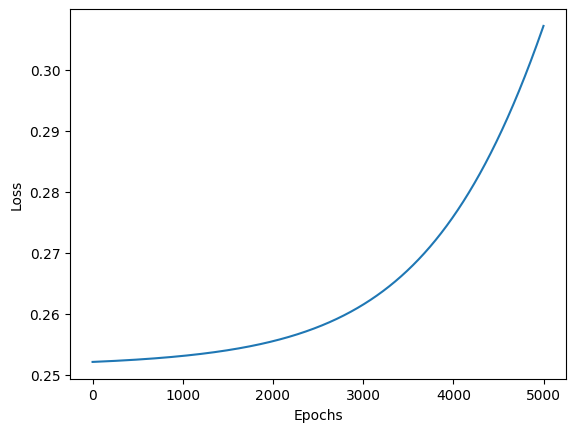

In [21]:
# Plotting the history
plt.plot(history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()